<a href="https://colab.research.google.com/github/arjunjanamatti/small_ML_and_DL_projects/blob/master/multi_class_classification/scoring_model_multiclass_new_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [2]:
# /content/drive/My Drive/Colab Notebooks/new_training_sampled_data.csv
raw_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/new_training_sampled_data.csv')
print('Shape of dataframe: ', raw_df.shape)
raw_df.head()

Shape of dataframe:  (7159, 15)


,mobile_speed,desktop_speed,h1_score,h2_score,h3_score,h4_score,h5_score,h6_score,text_score,title_score,desc_score,domain_score,path_score,alt_img_score,label
0,0.10,0.38,0.176190,0.956862,0.694302,0.504986,0.584546,0.0,0.831321,0.947349,0.910121,0.723818,0.000000,0.905837,Above average
1,0.19,0.67,0.960166,0.951623,0.941267,0.913687,0.000000,0.0,0.817475,0.960166,0.937368,0.000000,0.953657,0.818005,Above average
2,0.19,0.67,0.960166,0.951623,0.941267,0.913687,0.000000,0.0,0.817475,0.960166,0.937368,0.000000,0.953657,0.818005,Above average
3,0.76,0.80,0.952842,0.946973,0.725200,0.000000,0.000000,0.0,0.908703,0.953248,0.920241,0.960705,0.000000,0.856111,Above average
4,0.66,0.94,0.958777,0.948304,0.687632,0.957852,0.000000,0.0,0.940473,0.944708,0.953261,0.000000,0.956753,0.949096,Below average


In [3]:
# dropping rows with ' --'
raw_df_1 = raw_df[raw_df.label != ' --']
raw_df_1_copy = raw_df_1.copy()
print('Shape of dataframe: ', raw_df_1.shape)

Shape of dataframe:  (6177, 15)


In [4]:
raw_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6177 entries, 0 to 7158
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mobile_speed   6177 non-null   float64
 1   desktop_speed  6177 non-null   float64
 2   h1_score       6177 non-null   float64
 3   h2_score       6177 non-null   float64
 4   h3_score       6177 non-null   float64
 5   h4_score       6177 non-null   float64
 6   h5_score       6177 non-null   float64
 7   h6_score       6177 non-null   float64
 8   text_score     6177 non-null   float64
 9   title_score    6177 non-null   float64
 10  desc_score     6177 non-null   float64
 11  domain_score   6177 non-null   float64
 12  path_score     6177 non-null   float64
 13  alt_img_score  6177 non-null   float64
 14  label          6177 non-null   object 
dtypes: float64(14), object(1)
memory usage: 772.1+ KB


In [5]:
raw_df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_speed,6177.0,0.416338,0.248117,0.03,0.240000,0.340000,0.620000,0.950000
desktop_speed,6177.0,0.760008,0.173052,0.26,0.630000,0.800000,0.890000,0.990000
h1_score,6177.0,0.368735,0.348750,0.00,0.000000,0.345486,0.659929,0.962087
h2_score,6177.0,0.264263,0.306527,0.00,0.000000,0.130289,0.482919,0.983928
h3_score,6177.0,0.156731,0.259651,0.00,0.000000,0.000000,0.267577,0.961867
h4_score,6177.0,0.085891,0.217748,0.00,0.000000,0.000000,0.000000,0.959668
h5_score,6177.0,0.004242,0.047486,0.00,0.000000,0.000000,0.000000,0.883776
h6_score,6177.0,0.005270,0.052008,0.00,0.000000,0.000000,0.000000,0.858198
text_score,6177.0,0.390281,0.341971,0.00,0.000000,0.400727,0.724972,0.975733
title_score,6177.0,0.451320,0.325194,0.00,0.204784,0.421242,0.704000,0.962087


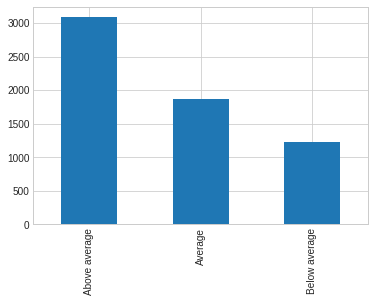

In [6]:
raw_df_1['label'].value_counts().plot.bar()

In [7]:
def encode_target(df):
    mapping = {"Below average": 0, "Average": 2, 'Above average': 1}
    return df.replace({'label': mapping})

raw_df_1 = encode_target(raw_df_1_copy)
raw_df_1

,mobile_speed,desktop_speed,h1_score,h2_score,h3_score,h4_score,h5_score,h6_score,text_score,title_score,desc_score,domain_score,path_score,alt_img_score,label
0,0.10,0.38,0.176190,0.956862,0.694302,0.504986,0.584546,0.0,0.831321,0.947349,0.910121,0.723818,0.000000,0.905837,1
1,0.19,0.67,0.960166,0.951623,0.941267,0.913687,0.000000,0.0,0.817475,0.960166,0.937368,0.000000,0.953657,0.818005,1
2,0.19,0.67,0.960166,0.951623,0.941267,0.913687,0.000000,0.0,0.817475,0.960166,0.937368,0.000000,0.953657,0.818005,1
3,0.76,0.80,0.952842,0.946973,0.725200,0.000000,0.000000,0.0,0.908703,0.953248,0.920241,0.960705,0.000000,0.856111,1
4,0.66,0.94,0.958777,0.948304,0.687632,0.957852,0.000000,0.0,0.940473,0.944708,0.953261,0.000000,0.956753,0.949096,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7154,0.17,0.68,0.747079,0.000000,0.000000,0.632901,0.000000,0.0,0.000000,0.733066,0.000000,0.000000,0.440106,0.661265,1
7155,0.17,0.68,0.749798,0.000000,0.000000,0.619312,0.000000,0.0,0.000000,0.734399,0.000000,0.000000,0.428500,0.662313,1
7156,0.17,0.68,0.745113,0.000000,0.000000,0.633802,0.000000,0.0,0.000000,0.728383,0.000000,0.000000,0.444215,0.648794,1
7157,0.18,0.58,0.769093,0.520079,0.381978,0.705201,0.000000,0.0,0.000000,0.792949,0.155687,0.000000,0.635789,0.813638,1


### Correlation matrix and Heatmaps

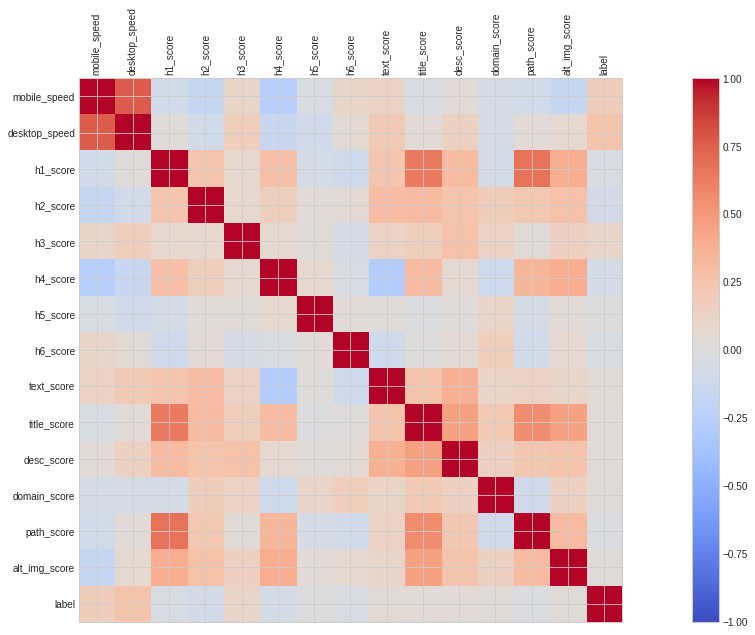

In [8]:
corr = raw_df_1.corr()

fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(raw_df_1.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(raw_df_1.columns)
ax.set_yticklabels(raw_df_1.columns)
plt.show()

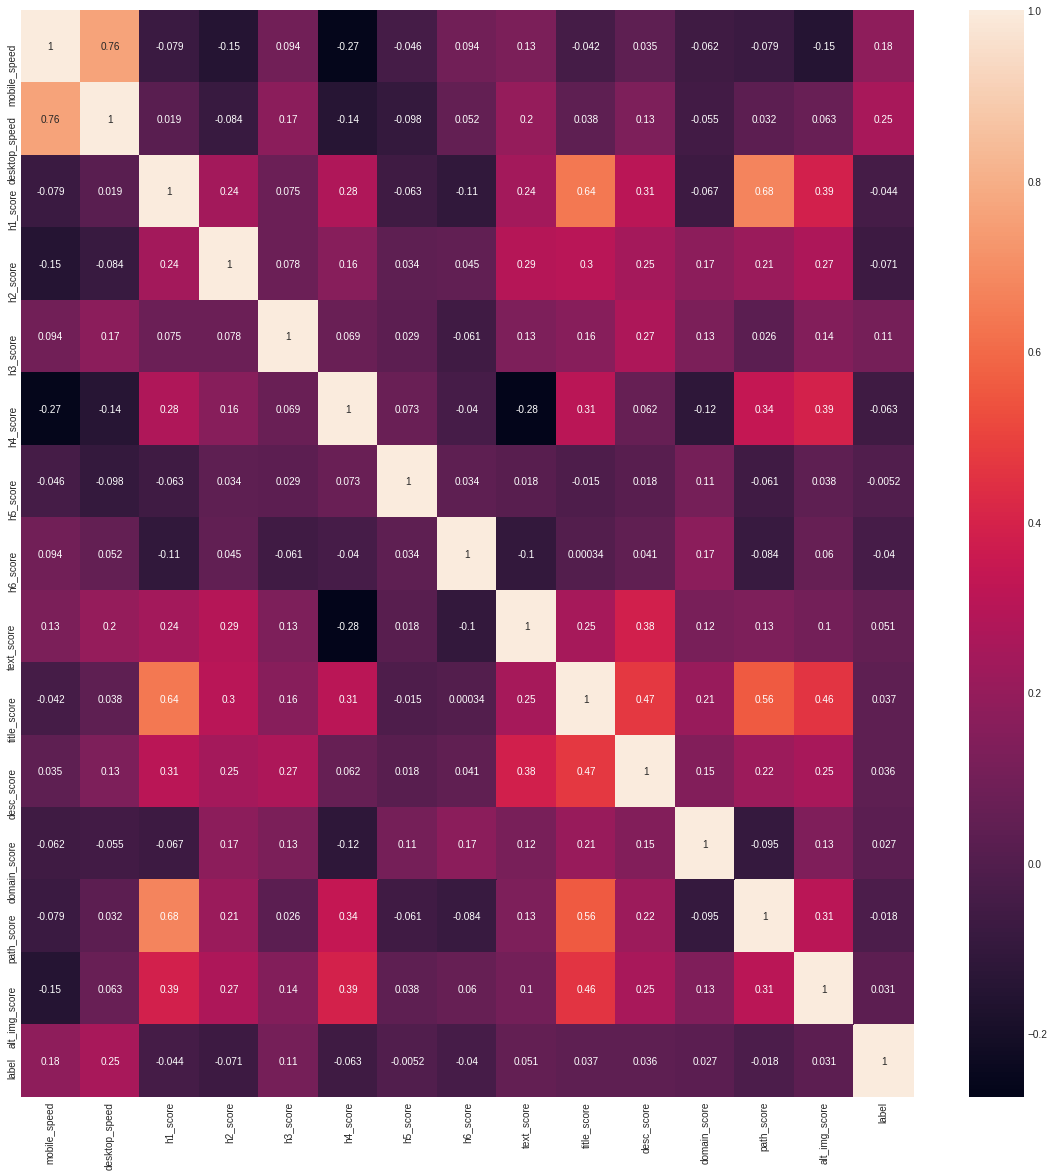

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(raw_df_1.corr(), annot=True)
plt.show()

### Handling Imbalance

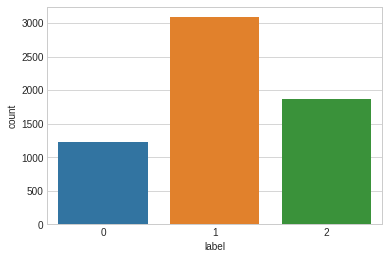

In [10]:
sns.countplot(raw_df_1['label'], label = 'Count')
plt.show()
# ['above average': '1',
#  'below average': '0',
#  'average': '2']

In [11]:
# class count
class_count_0, class_count_1, class_count_2 = raw_df_1['label'].value_counts()

# Separate class
class_0 = raw_df_1[raw_df_1['label'] == 0]
class_1 = raw_df_1[raw_df_1['label'] == 1]
class_2 = raw_df_1[raw_df_1['label'] == 2]

# print the shape of the class
print('above average:', class_0.shape)
print('average:', class_1.shape)
print('below average:', class_2.shape)

above average: (1226, 15)
average: (3087, 15)
below average: (1864, 15)


In [12]:
import imblearn
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from collections import Counter 

In [13]:
raw_df_1_array = raw_df_1.values 
X = raw_df_1.iloc[:,:-1]
y = raw_df_1.iloc[:,-1:]

In [14]:
tome_links = TomekLinks(sampling_strategy = 'majority')

x_tome_links, y_tome_links = tome_links.fit_resample(X, y)

print('Original dataset shape', (y.value_counts()))
print('Resample dataset shape', Counter(y_tome_links))

Original dataset shape label
1        3087
2        1864
0        1226
dtype: int64
Resample dataset shape Counter({1: 2953, 2: 1864, 0: 1226})


In [15]:
smote = SMOTE()

x_smote, y_smote = smote.fit_resample(X, y)
print('Original dataset shape', (y.value_counts()))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape label
1        3087
2        1864
0        1226
dtype: int64
Resample dataset shape Counter({1: 3087, 0: 3087, 2: 3087})


In [16]:
near_miss = NearMiss()
x_near_miss, y_near_miss = near_miss.fit_resample(X, y)
print('Original dataset shape', (y.value_counts()))
print('Resample dataset shape', Counter(y_near_miss))

Original dataset shape label
1        3087
2        1864
0        1226
dtype: int64
Resample dataset shape Counter({0: 1226, 1: 1226, 2: 1226})


### Machine Learning Algorithms

In [17]:
from xgboost import XGBClassifier
from sklearn.metrics import scorer, accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [18]:
def model_result(X_train, X_test, y_train, y_test, model):
  model_1 = model
  model_1.fit(X_train, y_train)
  precise_score = precision_score(y_true = y_test, y_pred = model_1.predict(X_test),average = 'macro')
  rec_score = recall_score(y_true = y_test, y_pred = model_1.predict(X_test),average = 'macro',)
  print('Precision score: {}% '.format(round(precise_score*100, 2)))
  print('Recall score: {}% '.format(round(rec_score*100, 2)))
  sns.heatmap(confusion_matrix(y_true = y_test, y_pred = model_1.predict(X_test)), annot = True)
  plt.show()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_near_miss, X_test_near_miss, y_train_near_miss, y_test_near_miss = train_test_split(x_near_miss, y_near_miss, test_size=0.2, random_state=42)
X_train_tome_links, X_test_tome_links, y_train_tome_links, y_test_tome_links = train_test_split(x_tome_links, y_tome_links, test_size=0.2, random_state=42)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

* __Recall_score__: Is the proportion of correct predicted labels to the total number of actual labels, averaged over instances.
* __Precision_score__:  The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

Results of imbbalanced dataset: 
Precision score: 68.75% 
Recall score: 65.89% 


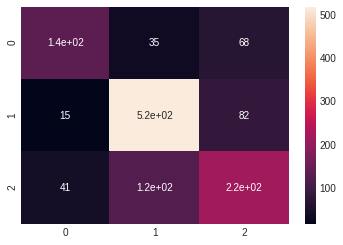


Results of nearMiss balancing: 
Precision score: 72.6% 
Recall score: 72.1% 


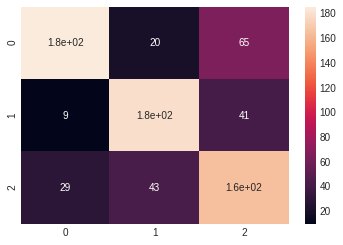


Results of TomeLinks balancing: 
Precision score: 69.54% 
Recall score: 64.8% 


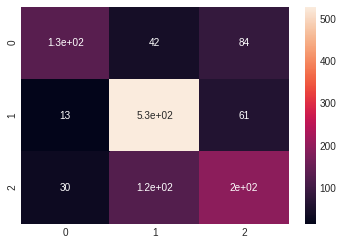


Results of SMOTE balancing: 
Precision score: 72.44% 
Recall score: 72.07% 


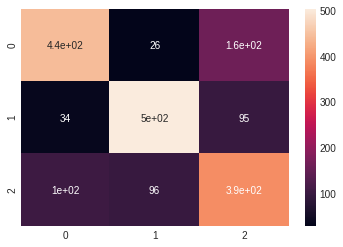

In [19]:
print('Results of imbbalanced dataset: ')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_result(X_train, X_test, y_train, y_test, model = XGBClassifier())
print()
print('Results of nearMiss balancing: ')
X_train, X_test, y_train, y_test = train_test_split(x_near_miss, y_near_miss, test_size=0.2, random_state=42)
model_result(X_train, X_test, y_train, y_test, model = XGBClassifier())
print()
print('Results of TomeLinks balancing: ')
X_train, X_test, y_train, y_test = train_test_split(x_tome_links, y_tome_links, test_size=0.2, random_state=42)
model_result(X_train, X_test, y_train, y_test, model = XGBClassifier())
print()
print('Results of SMOTE balancing: ')
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)
model_result(X_train, X_test, y_train, y_test, model = XGBClassifier())

* Recall score is highest for imbalance dataset handled by SMOTE for XGBClassifier model.
* Recall score is more reliable, the precision score is highest for imbalanced dataset, this may be due to the fact it is able to predict above average correctly, since this is a significant number, it may not give the true picture.

### Artificial Neural Network

In [20]:
y_smote_modified = np.where(y_smote == 2, 0.5, y_smote)

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [22]:
# X = raw_df_1_copy.iloc[:,:-1]
# y = raw_df_1_copy.iloc[:,-1:]
# # encode class values as integers
# encoder = LabelEncoder()
# encoder.fit(y)
# encoded_Y = encoder.transform(y)
# # convert integers to dummy variables (i.e. one hot encoded)
# dummy_y = tf.keras.utils.to_categorical(encoded_Y)
 
# # function for sequential model
# # input dimension is the number of features
# # number of categories in output is 3
# def sequential_model():
#   model = Sequential()
#   model.add(Dense(64, input_dim = X.shape[1], activation = 'relu'))
#   model.add(Dropout(rate = 0.2))
#   model.add(Dense(3, activation = 'softmax'))
#   # compiling the model
#   model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#   return model
 
# estimator = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn = sequential_model, 
#                                                            epochs = 100, 
#                                                            batch_size = 32, 
#                                                            verbose = 0)
# kfold = KFold(n_splits=10, 
#               shuffle=True)
# results = cross_val_score(estimator, 
#                           X, 
#                           dummy_y, 
#                           cv=kfold,)
# print("Average accuracy: %.2f%%, Standard deviation across results: %.2f%%" % (results.mean()*100, results.std()*100))

In [23]:
# x_smote, y_smote
def sequential_model_1():
  model = Sequential()
  model.add(Dense(64, input_dim = X.shape[1], activation = 'relu'))
  model.add(Dropout(rate = 0.2))
  model.add(Dense(1))
  # compiling the model
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote_modified, test_size=0.1, random_state=42)
# dummy_y_train = tf.keras.utils.to_categorical(y_train)
# dummy_y_test = tf.keras.utils.to_categorical(y_test)
ann_model = sequential_model_1()
ann_model.fit(X_train, y_train, epochs = 500, batch_size=32, validation_data= (X_test, y_test),)

Epoch 1/500
261/261 [==============================] - 0s 2ms/step - loss: 0.1524 - val_loss: 0.1245
Epoch 2/500
261/261 [==============================] - 0s 1ms/step - loss: 0.1272 - val_loss: 0.1120
Epoch 3/500
261/261 [==============================] - 0s 1ms/step - loss: 0.1165 - val_loss: 0.1028
Epoch 4/500
261/261 [==============================] - 0s 1ms/step - loss: 0.1109 - val_loss: 0.0999
Epoch 5/500
261/261 [==============================] - 0s 1ms/step - loss: 0.1073 - val_loss: 0.0952
Epoch 6/500
261/261 [==============================] - 0s 1ms/step - loss: 0.1027 - val_loss: 0.0917
Epoch 7/500
261/261 [==============================] - 0s 1ms/step - loss: 0.1003 - val_loss: 0.0912
Epoch 8/500
261/261 [==============================] - 0s 1ms/step - loss: 0.0988 - val_loss: 0.0874
Epoch 9/500
261/261 [==============================] - 0s 1ms/step - loss: 0.0978 - val_loss: 0.0881
Epoch 10/500
261/261 [==============================] - 0s 1ms/step - loss: 0.0949 - val_lo

### Prediction

In [24]:
# def predict_risk(mobile_speed, desktop_speed,h1_score, h2_score, h3_score, h4_score, h5_score, h6_score, text_score, title_score, desc_score, domain_score, path_score, alt_img_score, model):
#     df = pd.DataFrame.from_dict({'mobile_speed': [mobile_speed],
#                                  'desktop_speed': [desktop_speed],
#                                  'h1_score': [h1_score], 
#                                  'h2_score': [h2_score], 
#                                  'h3_score': [h3_score],
#                                  'h4_score': [h4_score], 
#                                  'h5_score': [h5_score], 
#                                  'h6_score': [h6_score],
#                                  'text_score': [text_score], 
#                                  'title_score': [title_score], 
#                                  'desc_score': [desc_score],
#                                  'domain_score': [domain_score], 
#                                  'path_score': [path_score], 
#                                  'alt_img_score': [alt_img_score]})
    
#     array_file = df.to_numpy()
#     pred = model.predict_proba(array_file)[0]
#     print(f'The probability of above average is {round(pred[0]*100,2)}%')
#     print(f'probability of below average is {round(pred[2]*100,2)}%')
#     print(f'probability of average is {round(pred[1]*100,2)}%') 
                                                                                                                               
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

def predict_risk_regression(mobile_speed, desktop_speed,h1_score, h2_score, h3_score, h4_score, h5_score, h6_score, text_score, title_score, desc_score, domain_score, path_score, alt_img_score, model):
    df = pd.DataFrame.from_dict({'mobile_speed': [mobile_speed],
                                 'desktop_speed': [desktop_speed],
                                 'h1_score': [h1_score], 
                                 'h2_score': [h2_score], 
                                 'h3_score': [h3_score],
                                 'h4_score': [h4_score], 
                                 'h5_score': [h5_score], 
                                 'h6_score': [h6_score],
                                 'text_score': [text_score], 
                                 'title_score': [title_score], 
                                 'desc_score': [desc_score],
                                 'domain_score': [domain_score], 
                                 'path_score': [path_score], 
                                 'alt_img_score': [alt_img_score]})
    
    array_file = df.to_numpy()
    pred = model.predict(array_file)[0]
    print(pred)
    # print(f'The probability of above average is {round(pred[0]*100,2)}%')
    # print(f'probability of below average is {round(pred[2]*100,2)}%')
    # print(f'probability of average is {round(pred[1]*100,2)}%') 

### XGB Classifier Results
model = XGBClassifier()
model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [25]:
#@title Input fields
mobile_speed  = 0.906338 #@param {type:"number"}
desktop_speed = 0.900008 #@param {type:"number"}
h1_score = 0.825894 #@param {type:"number"}
h2_score = 0.273280 #@param {type:"number"}
h3_score = 0.269234 #@param {type:"number"}
h4_score = 0.011647 #@param {type:"number"}
h5_score = 0.0 #@param {type:"number"}
h6_score = 0.020552 #@param {type:"number"}
text_score = 0.381590 #@param {type:"number"}
title_score = 0.326399 #@param {type:"number"}
desc_score = 0.401051 #@param {type:"number"}
domain_score = 0.276322 #@param {type:"number"}
path_score = 0.090630 #@param {type:"number"}
alt_img_score = 0.342019 #@param {type:"number"}


In [26]:
# print('Artificial Neural Network Model results')
# predict_risk(mobile_speed, desktop_speed, h1_score,h2_score, h3_score, h4_score, h5_score, h6_score, 
#              text_score, title_score, desc_score, domain_score, path_score, 
#              alt_img_score, ann_model)

In [27]:
print('Artificial Neural Network Model results')
predict_risk_regression(mobile_speed, desktop_speed, h1_score,h2_score, h3_score, h4_score, h5_score, h6_score, 
             text_score, title_score, desc_score, domain_score, path_score, 
             alt_img_score, ann_model)

Artificial Neural Network Model results
[0.56427294]
